In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', 100)

In [3]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(f"Train data shape {train.shape}")
print(f"Trest data shape {test.shape}")

Train data shape (1460, 81)
Trest data shape (1459, 80)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
missing_val_obj = []
missing_val_float = []

for column in train.columns:
    if train[column].isnull().sum() != 0:
        print(f"{column} : {train[column].isnull().sum()}, {train[column].dtypes}")
        if train[column].dtypes == object:
            missing_val_obj.append(column)
        else:
            missing_val_float.append(column)

LotFrontage : 259, float64
Alley : 1369, object
MasVnrType : 8, object
MasVnrArea : 8, float64
BsmtQual : 37, object
BsmtCond : 37, object
BsmtExposure : 38, object
BsmtFinType1 : 37, object
BsmtFinType2 : 38, object
Electrical : 1, object
FireplaceQu : 690, object
GarageType : 81, object
GarageYrBlt : 81, float64
GarageFinish : 81, object
GarageQual : 81, object
GarageCond : 81, object
PoolQC : 1453, object
Fence : 1179, object
MiscFeature : 1406, object


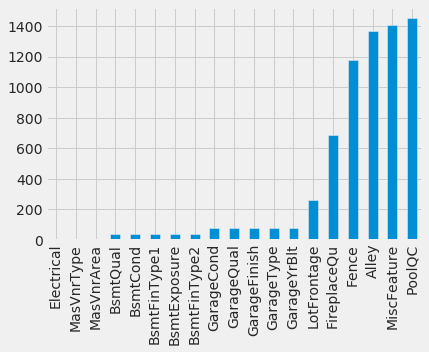

In [7]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [8]:
print(f"Object type columns with missing values :\n {missing_val_obj}")
print(f"Other types columns with missing values :\n {missing_val_float}")

Object type columns with missing values :
 ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Other types columns with missing values :
 ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [9]:
train.drop(["Alley" ,"PoolQC", "Fence", "MiscFeature", "Id"], axis="columns", inplace=True)
to_delete_features = ["Alley" ,"PoolQC", "Fence", "MiscFeature"]
for item in to_delete_features:
    missing_val_obj.remove(item)

In [10]:
for column in missing_val_float:
    train[column] = train[column].fillna(train[column].mean())

In [11]:
for column in train.columns:
    if train[column].isnull().sum() != 0:
        print(f"{column} : {train[column].isnull().sum()}, {train[column].dtypes}")

MasVnrType : 8, object
BsmtQual : 37, object
BsmtCond : 37, object
BsmtExposure : 38, object
BsmtFinType1 : 37, object
BsmtFinType2 : 38, object
Electrical : 1, object
FireplaceQu : 690, object
GarageType : 81, object
GarageFinish : 81, object
GarageQual : 81, object
GarageCond : 81, object


In [12]:
for column in missing_val_obj:
    train[column] = train[column].fillna(train[column].mode()[0])

In [13]:
for column in train.columns:
    if train[column].isnull().sum() != 0:
        print(f"{column} : {train[column].isnull().sum()}, {train[column].dtypes}")

In [14]:
num_variables = [column for column in train.columns if train[column].dtype != object]
len(num_variables)

37

In [15]:
yr_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for col in yr_features:
    print(f"============= {col} : {train[col].nunique()} ============= \n {train[col].unique()}")

============= YearBuilt : 112 ============= 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
============= YearRemodAdd : 61 ============= 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
============= GarageYrBlt 

Text(0.5, 1.0, 'House Price vs YearSold')

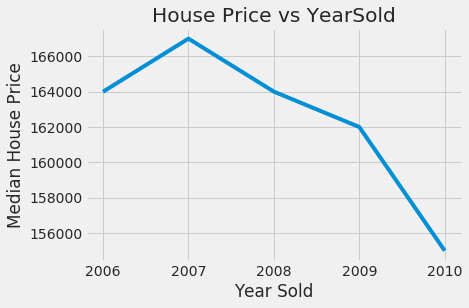

In [16]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

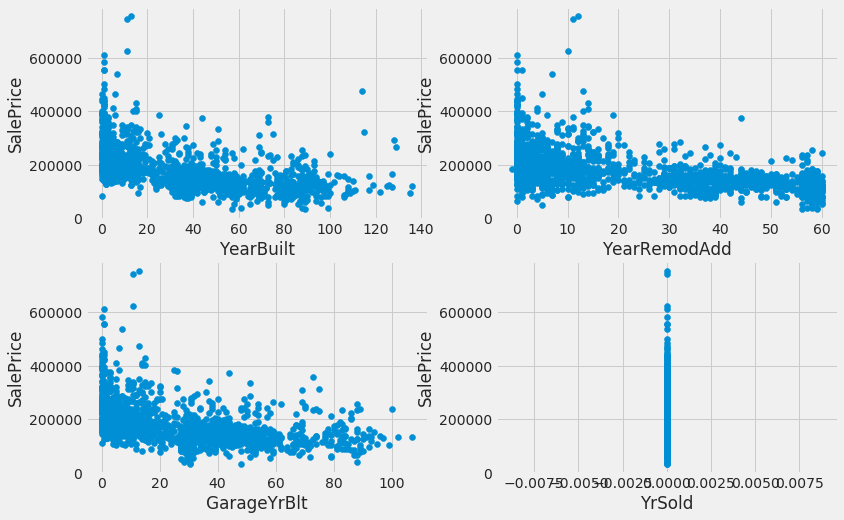

In [17]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(yr_features, 1):
    
    data = train.copy()
    ## We will capture the difference between year variable and year the house was sold for
    data[feature] = data['YrSold'] - data[feature]
    plt.subplot(2, 2, i)
    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

In [18]:
cat_variables = [column for column in num_variables if train[column].nunique() < 25]
cat_variables.remove('YrSold')
len(cat_variables)

17

In [19]:
train[cat_variables].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


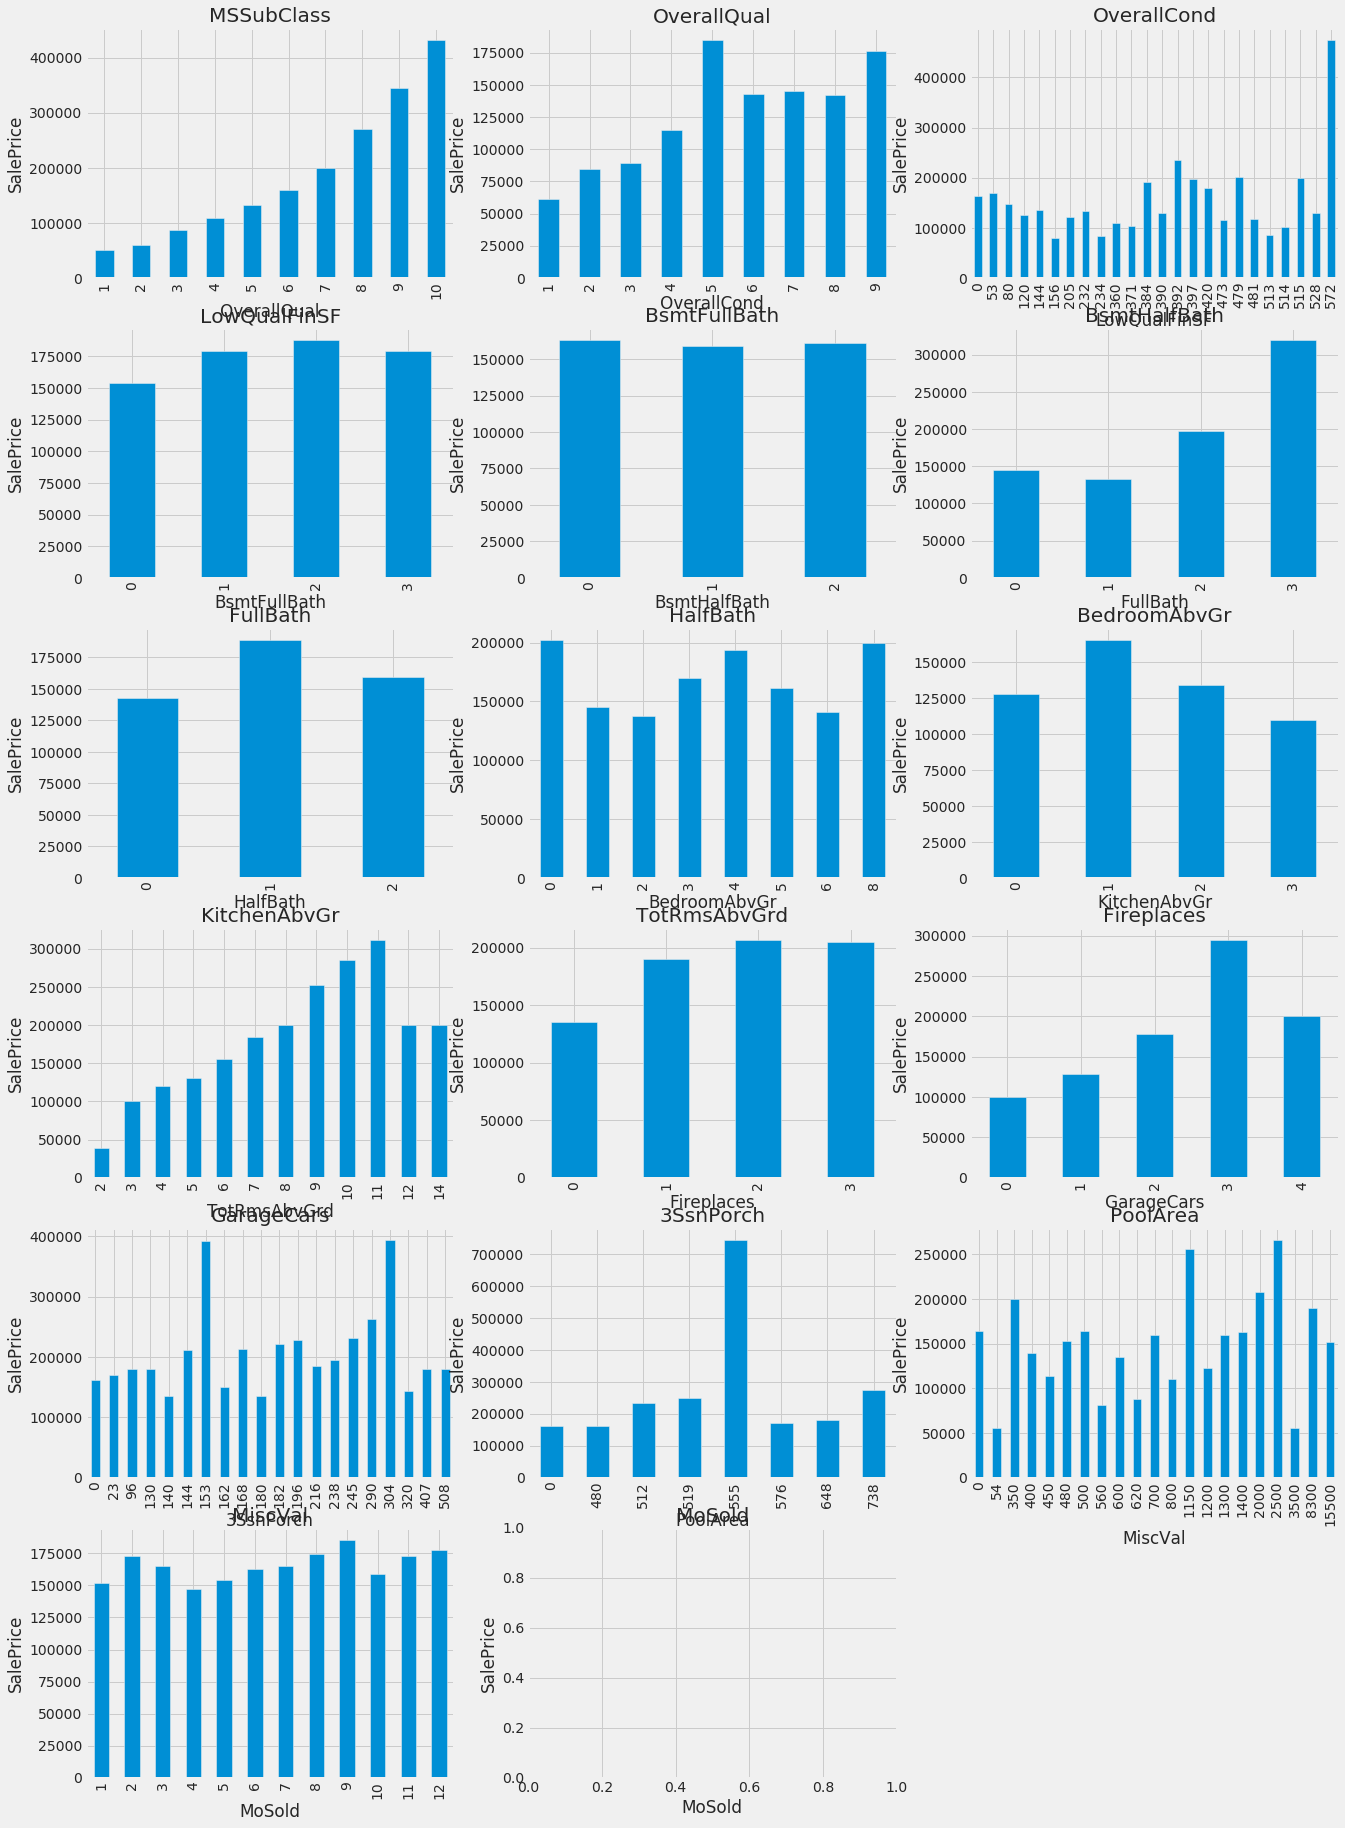

In [20]:
plt.figure(figsize=(20, 30))

for i, feature in enumerate(cat_variables, 1):
    data = train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.subplot(6, 3, i)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)

In [21]:
disc_variables = [column for column in num_variables if train[column].nunique() > 25 and column not in yr_features]
len(disc_variables)


16

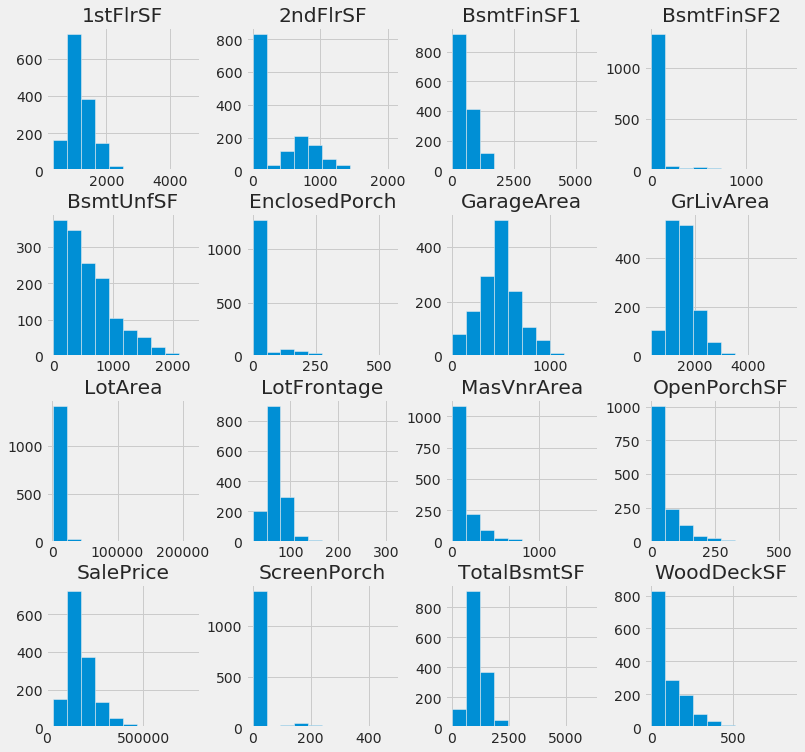

In [22]:
train[disc_variables].hist(figsize=(12, 12));

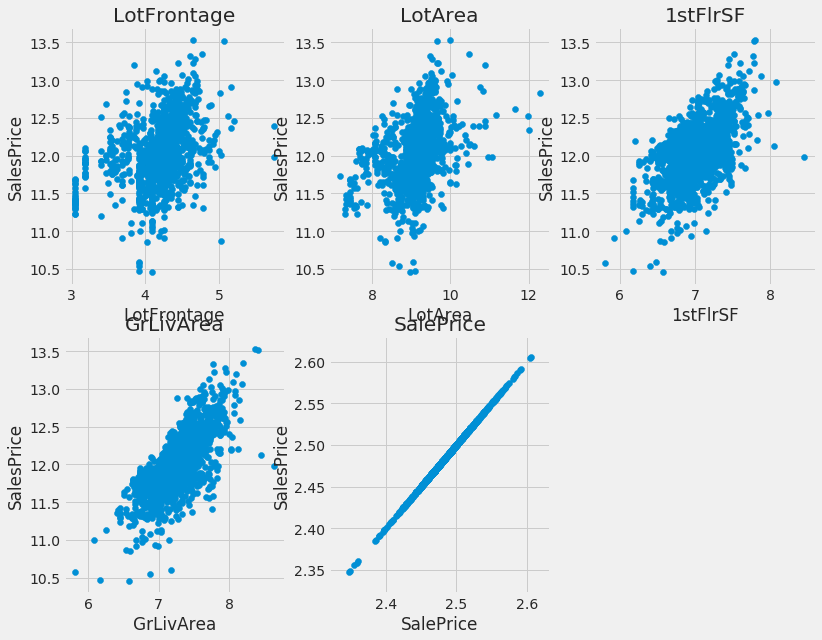

In [23]:
plt.figure(figsize=(12, 15))

i = 1
for feature in disc_variables:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.subplot(3, 3, i)
        i += 1
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)

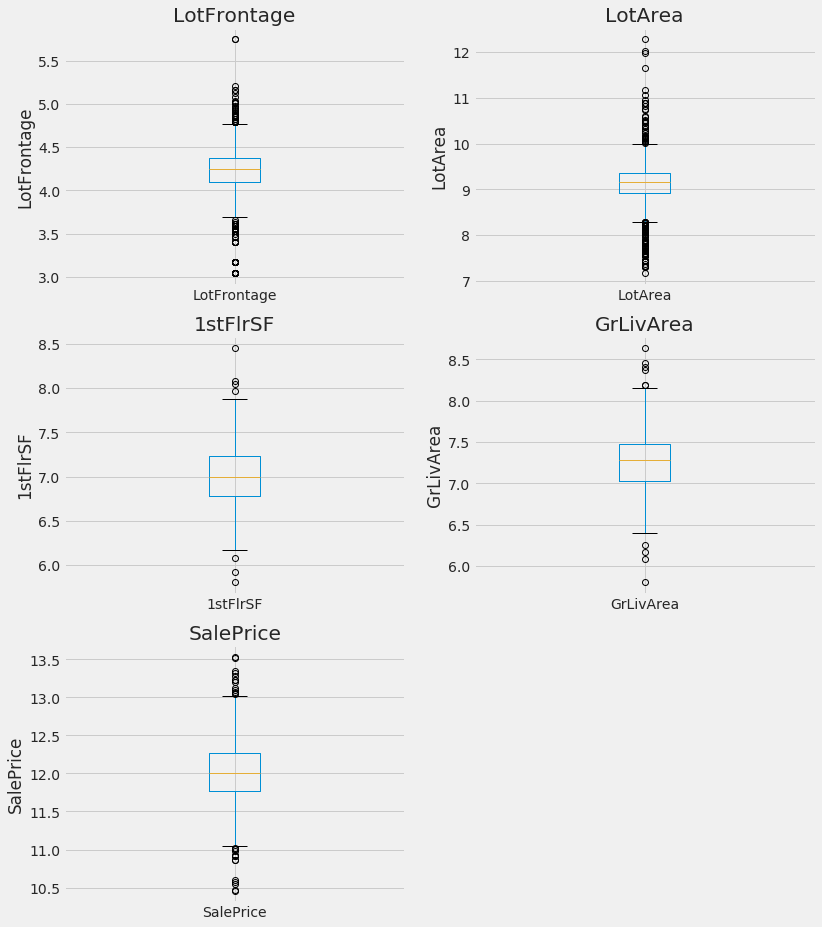

In [24]:
plt.figure(figsize=(12, 15))

i = 1
for feature in disc_variables:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.subplot(3, 2, i)
        i += 1
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)

In [25]:
cat_features = [column for column in train.columns if train[column].dtype == object]
len(cat_features)

39

In [26]:
train[cat_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [27]:
for column in cat_features:
    print(f"{column}: Number of unique values {train[column].nunique()}")

MSZoning: Number of unique values 5
Street: Number of unique values 2
LotShape: Number of unique values 4
LandContour: Number of unique values 4
Utilities: Number of unique values 2
LotConfig: Number of unique values 5
LandSlope: Number of unique values 3
Neighborhood: Number of unique values 25
Condition1: Number of unique values 9
Condition2: Number of unique values 8
BldgType: Number of unique values 5
HouseStyle: Number of unique values 8
RoofStyle: Number of unique values 6
RoofMatl: Number of unique values 8
Exterior1st: Number of unique values 15
Exterior2nd: Number of unique values 16
MasVnrType: Number of unique values 4
ExterQual: Number of unique values 4
ExterCond: Number of unique values 5
Foundation: Number of unique values 6
BsmtQual: Number of unique values 4
BsmtCond: Number of unique values 4
BsmtExposure: Number of unique values 4
BsmtFinType1: Number of unique values 6
BsmtFinType2: Number of unique values 6
Heating: Number of unique values 6
HeatingQC: Number of un

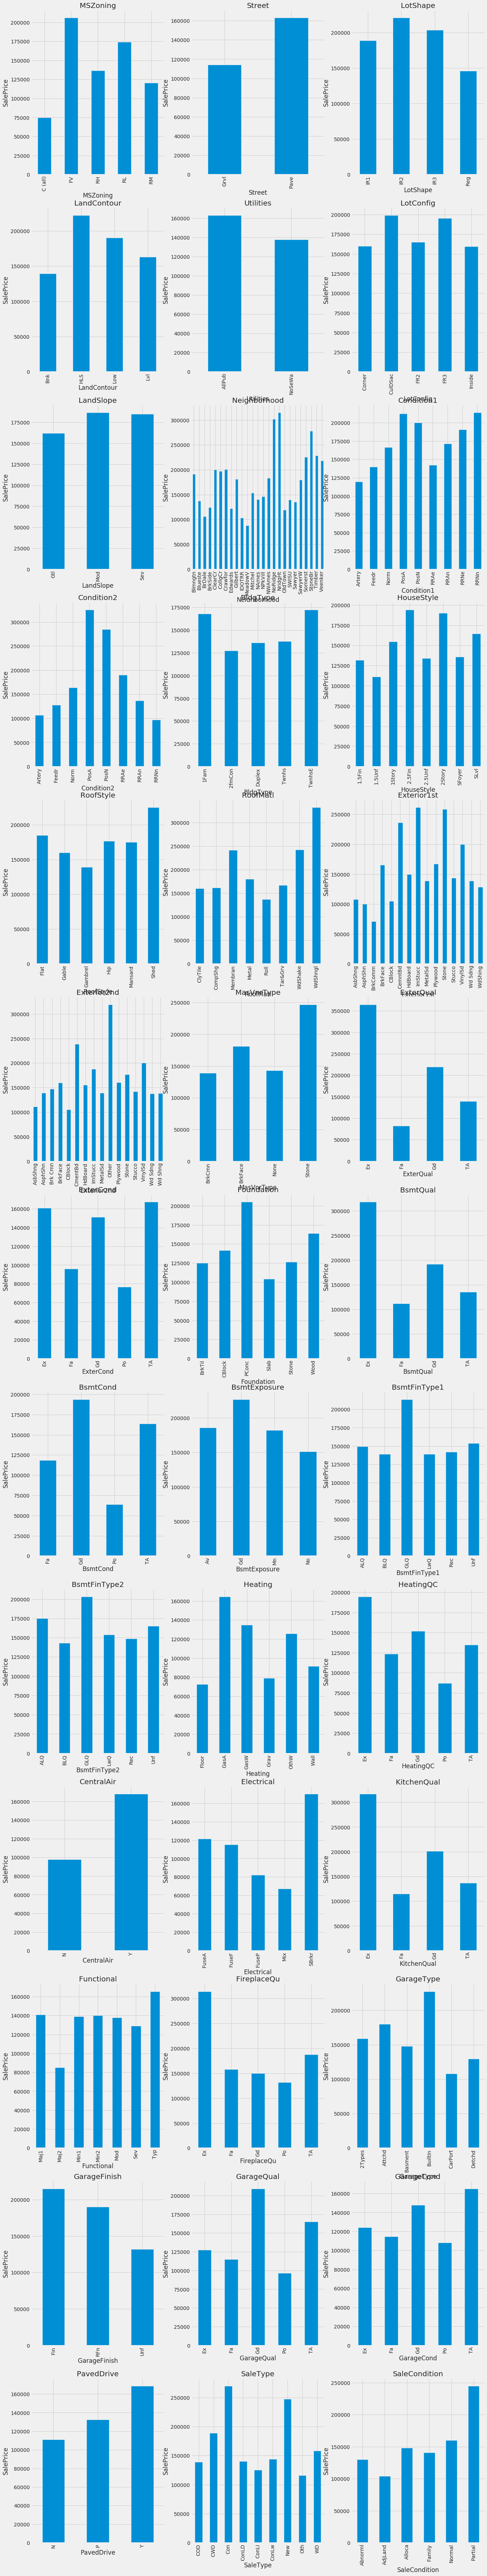

In [28]:
plt.figure(figsize=(20, 120))

for i, feature in enumerate(cat_features, 1):
    plt.subplot(13, 3, i)
    data = train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)

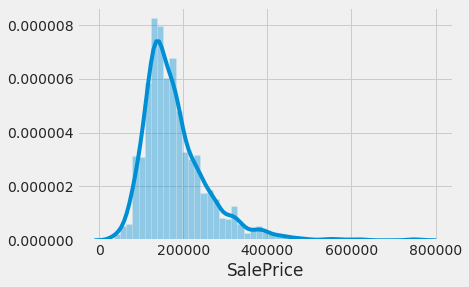

In [29]:
sns.distplot(train.SalePrice)

In [30]:
print(f"Skeweness: {train.SalePrice.skew()}")
print(f"Kurtosis: {train.SalePrice.kurt()}")

Skeweness: 1.8828757597682129
Kurtosis: 6.536281860064529


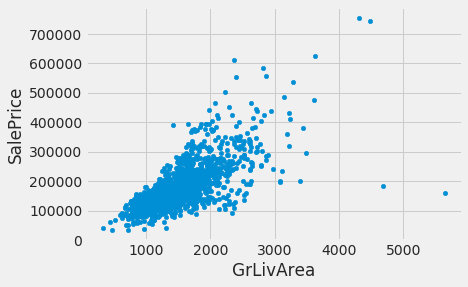

In [31]:
data = pd.concat([train.SalePrice, train.GrLivArea], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice')

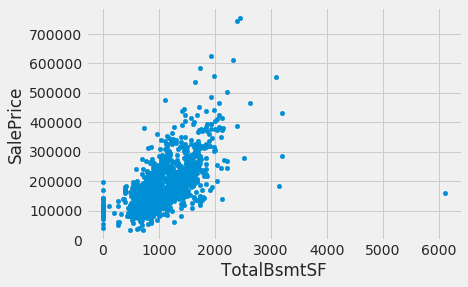

In [32]:
data = pd.concat([train.SalePrice, train.TotalBsmtSF], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice')

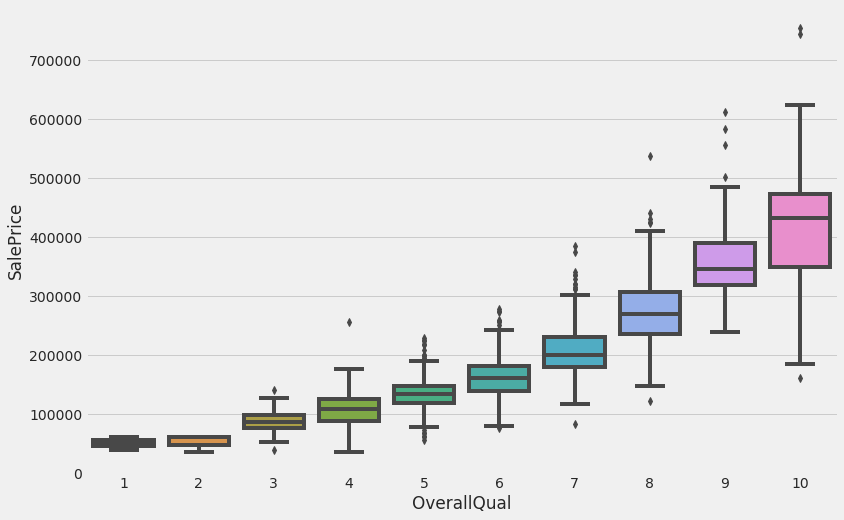

In [33]:
plt.figure(figsize=(12, 8))
data = pd.concat([train.SalePrice, train.OverallQual], axis=1)
sns.boxplot(x='OverallQual', y='SalePrice', data=data)

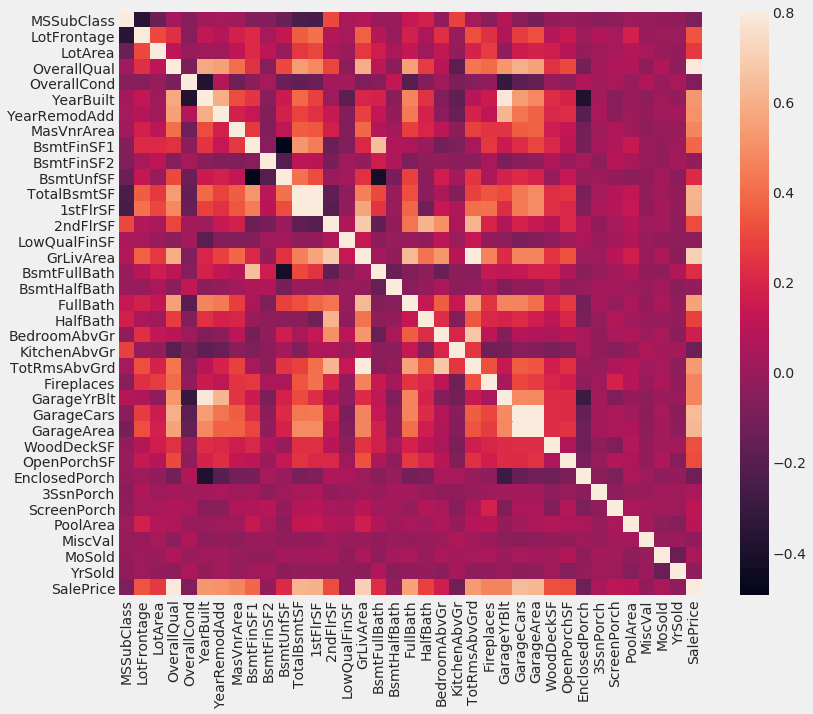

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), vmax=.8, square=True)

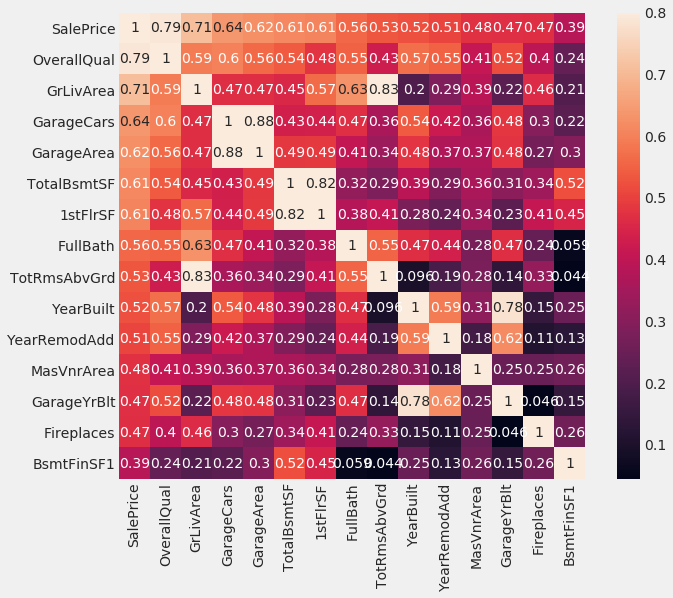

In [35]:
cols = train.corr().nlargest(15, 'SalePrice')['SalePrice'].index
plt.figure(figsize=(10, 8))
sns.heatmap(train[cols].corr(), annot=True, vmax=.8, square=True)

In [36]:
missing_val_obj = []
missing_val_float = []

for column in test.columns:
    if test[column].isnull().sum() != 0:
        print(f"{column} : {test[column].isnull().sum()}, {test[column].dtypes}")
        if test[column].dtypes == object:
            missing_val_obj.append(column)
        else:
            missing_val_float.append(column)

MSZoning : 4, object
LotFrontage : 227, float64
Alley : 1352, object
Utilities : 2, object
Exterior1st : 1, object
Exterior2nd : 1, object
MasVnrType : 16, object
MasVnrArea : 15, float64
BsmtQual : 44, object
BsmtCond : 45, object
BsmtExposure : 44, object
BsmtFinType1 : 42, object
BsmtFinSF1 : 1, float64
BsmtFinType2 : 42, object
BsmtFinSF2 : 1, float64
BsmtUnfSF : 1, float64
TotalBsmtSF : 1, float64
BsmtFullBath : 2, float64
BsmtHalfBath : 2, float64
KitchenQual : 1, object
Functional : 2, object
FireplaceQu : 730, object
GarageType : 76, object
GarageYrBlt : 78, float64
GarageFinish : 78, object
GarageCars : 1, float64
GarageArea : 1, float64
GarageQual : 78, object
GarageCond : 78, object
PoolQC : 1456, object
Fence : 1169, object
MiscFeature : 1408, object
SaleType : 1, object


In [37]:
print(f"Object type columns with missing values : {missing_val_obj}")
print(f"Other types columns with missing values : {missing_val_float}")

Object type columns with missing values : ['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
Other types columns with missing values : ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [38]:
test.drop(["Alley" ,"PoolQC", "Fence", "MiscFeature", "Id"], axis="columns", inplace=True)
to_delete_features = ["Alley" ,"PoolQC", "Fence", "MiscFeature"]
for item in to_delete_features:
    missing_val_obj.remove(item)

In [39]:
for column in missing_val_float:
    test[column] = test[column].fillna(test[column].mean())

In [40]:
for column in test.columns:
    if test[column].isnull().sum() != 0:
        print(f"{column} : {test[column].isnull().sum()}, {test[column].dtypes}")

MSZoning : 4, object
Utilities : 2, object
Exterior1st : 1, object
Exterior2nd : 1, object
MasVnrType : 16, object
BsmtQual : 44, object
BsmtCond : 45, object
BsmtExposure : 44, object
BsmtFinType1 : 42, object
BsmtFinType2 : 42, object
KitchenQual : 1, object
Functional : 2, object
FireplaceQu : 730, object
GarageType : 76, object
GarageFinish : 78, object
GarageQual : 78, object
GarageCond : 78, object
SaleType : 1, object


In [41]:
for column in missing_val_obj:
    test[column] = test[column].fillna(test[column].mode()[0])

In [42]:
for column in test.columns:
    if test[column].isnull().sum() != 0:
        print(f"{column} : {test[column].isnull().sum()}, {test[column].dtypes}")

In [43]:
test.shape

(1459, 75)

In [44]:
train.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','2ndFlrSF'], axis=1, inplace=True)
test.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','2ndFlrSF'], axis=1, inplace=True)

In [45]:
train = train[train['GrLivArea'] < 4500]

In [46]:
train.shape

(1458, 72)

In [47]:
full_df = pd.concat([train, test], axis=0, sort=False)
full_df.shape

(2917, 72)

In [48]:
numeric_features = []
for column in full_df.columns:
    if train[column].dtype != object and len(train[column].unique()) < 22:
        numeric_features.append(column)

# Excluding "id", "SalePrice" columns.

# categorical_20 = ["MSSubClass", "OverallQual", "OverallCond", "LowQualFinSF", 
#                   "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", 
#                   "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "3SsnPorch", 
#                   "PoolArea", "MiscVal", "MoSold", "YrSold"]

# categorical_100 = ["LotFrontage", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "EnclosedPorch", 
#                    "ScreenPorch"]

# non_categorical = ["LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", 
print(numeric_features)

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [49]:
for column in numeric_features:
    encoding = full_df.groupby(column).size()
    encoding = encoding / len(full_df)
    full_df[column] = full_df[column].map(encoding)

In [50]:
full_df[numeric_features].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.196435,0.205691,0.563250,0.401440,0.939321,0.524169,0.362701,0.546452,0.954062,0.486802,0.546109,0.987316,0.995886,0.96469,0.045595,0.212890
1,0.369901,0.250600,0.049366,0.584505,0.058622,0.524169,0.628728,0.546452,0.954062,0.434350,0.546109,0.987316,0.995886,0.96469,0.135070,0.236887
2,0.196435,0.205691,0.563250,0.401440,0.939321,0.524169,0.362701,0.546452,0.954062,0.434350,0.546109,0.987316,0.995886,0.96469,0.054165,0.212890
3,0.043881,0.205691,0.563250,0.401440,0.939321,0.448749,0.628728,0.546452,0.954062,0.434350,0.127871,0.987316,0.995886,0.96469,0.045595,0.212204
4,0.196435,0.117244,0.563250,0.401440,0.939321,0.524169,0.362701,0.137127,0.954062,0.434350,0.127871,0.987316,0.995886,0.96469,0.035653,0.212890


In [51]:
categorical_col = []
label_col = []
for column in full_df.columns:
    if len(full_df[column].unique()) <= 10 and full_df[column].dtypes == object:
        categorical_col.append(column)
    elif full_df[column].dtypes == object:
        label_col.append(column)

In [52]:
print(categorical_col)
print(label_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['Neighborhood', 'Exterior1st', 'Exterior2nd']


In [53]:
full_df = pd.get_dummies(full_df, columns=categorical_col + label_col)

In [54]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Columns: 271 entries, MSSubClass to Exterior2nd_Wd Shng
dtypes: float64(24), int64(9), uint8(238)
memory usage: 1.4 MB


In [55]:
df_train = full_df[full_df.SalePrice.notna()]
df_train.shape

(1458, 271)

In [56]:
df_test = full_df[full_df.SalePrice.isna()]
df_test.drop('SalePrice', axis='columns', inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
df_test.shape

(1459, 270)

In [58]:
X_train = df_train.drop('SalePrice', axis='columns')
y_train = df_train.SalePrice

In [59]:
print(X_train.shape)
print(y_train.shape)

(1458, 270)
(1458,)


In [60]:
import xgboost
# classifier = xgboost.XGBRegressor()
# classifier.fit(X_train, y_train)

In [61]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 1]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
    }

In [62]:
regressor = xgboost.XGBRegressor(base_score=0.25, 
                                 booster='gbtree', 
                                 learning_rate=0.1, 
                                 max_delta_step=0,
                                 max_depth=2, 
                                 min_child_weight=1, 
                                 n_estimators=900,
                                 verbosity=1)


In [63]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=1)

In [64]:
import pickle
filename = "finalization_model.pkl"
pickle.dump(regressor, open(filename, "wb"))

In [65]:
y_pred = regressor.predict(df_test)

In [ ]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv(path_or_buf='submission.csv', index=False)